"""# **Task 3**

**EMAIL SPAM DETECTION WITH MACHINE LEARNING**

Weve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.
In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Lets get
started!
DOWNLOAD DATASET FROM HERE
"""

Index(['v1', 'v2'], dtype='object')
4701                                           Anytime...
2127    Tessy..pls do me a favor. Pls convey my birthd...
3590              How much would it cost to hire a hitman
919                 Dont talk to him ever ok its my word.
2331                                   At home by the way
Name: message, dtype: object
Accuracy: 0.9838565022421525


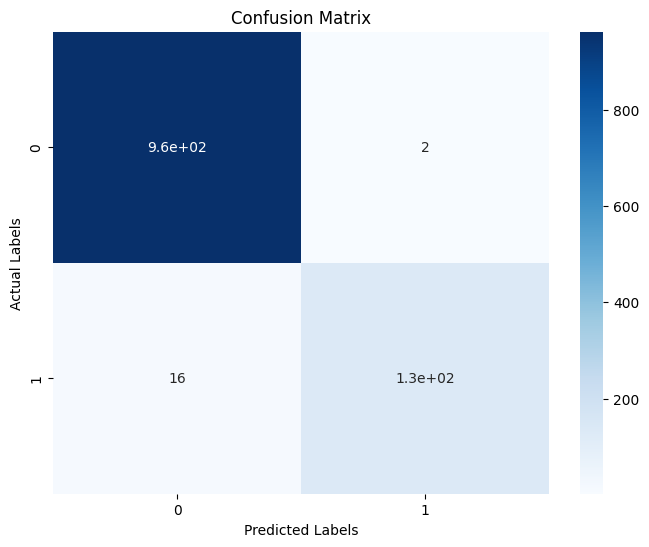

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
sms_data = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

sms_data

sms_data.isna().sum()

# Adjust the column names accordingly
sms_data = sms_data[['v1', 'v2']]
sms_data

print(sms_data.columns)

sms_data.columns = ['label', 'message']
sms_data.groupby('label').describe()

sms_data.replace({
    'spam': 1,
    'ham': 0
}, inplace=True)
sms_data

X_train.shape, X_test.shape

type(X_train), type(X_train.values)

# Split the data into training and testing sets
X = sms_data['message']
y = sms_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train.values)
X_train_vectorized.toarray()

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

email = X_train.sample(5)
print(email)
email_count = vectorizer.transform(email)
model.predict(email_count)

X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()